In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data
import random
sns.set_context("talk")
random.seed(1)
np.random.seed(1)


cat="https://pngimg.com/uploads/cat/cat_PNG50550.png"
dog="https://pngimg.com/uploads/dog/small/dog_PNG2414.png"
rabbit="https://pngimg.com/uploads/rabbit/small/rabbit_PNG5638.png"


def imscatter(x, y, image, ax=None, zoom=1):
    image = plt.imread(image)
    im = OffsetImage(image, zoom=zoom)
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0 in zip(x, y):
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists


def plot(n_neighbors):
    # import some data to play with
    iris = datasets.load_iris()

    # we only take the first two features. We could avoid this ugly
    # slicing by using a two-dim dataset

    X = iris.data[:, :2]
    y = iris.target
    h = 0.02  # step size in the mesh
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights="uniform")
    clf.fit(X, y)

    X = iris.data[:, :2]
    indices = list(range(0, len(X), int(len(X)/25)))
    X = X[indices, :]
    y = iris.target[indices]

    # Create color maps
    cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
    cmap_bold = ["darkorange", "c", "darkblue"]


    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(12, 12))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    ax = sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=[{"setosa": "cat", "virginica": "dog", "versicolor": "rabbit"}[x]
             for x in iris.target_names[y]],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
    for w in range(len(X)):
        if iris.target_names[y[w]] == "setosa":
            imscatter(X[w, 0], X[w, 1], cat, zoom=0.1, ax=ax)
        elif iris.target_names[y[w]] == "virginica":
            imscatter(X[w, 0], X[w, 1], dog, zoom=0.4, ax=ax)
        else:
            imscatter(X[w, 0], X[w, 1], rabbit, zoom=0.4, ax=ax)

    plt.title(
        "classification, k = %i" % (n_neighbors)
    )
    plt.xlim(4, 7.5)
    plt.ylim(1.8, 4.2)
    plt.show()

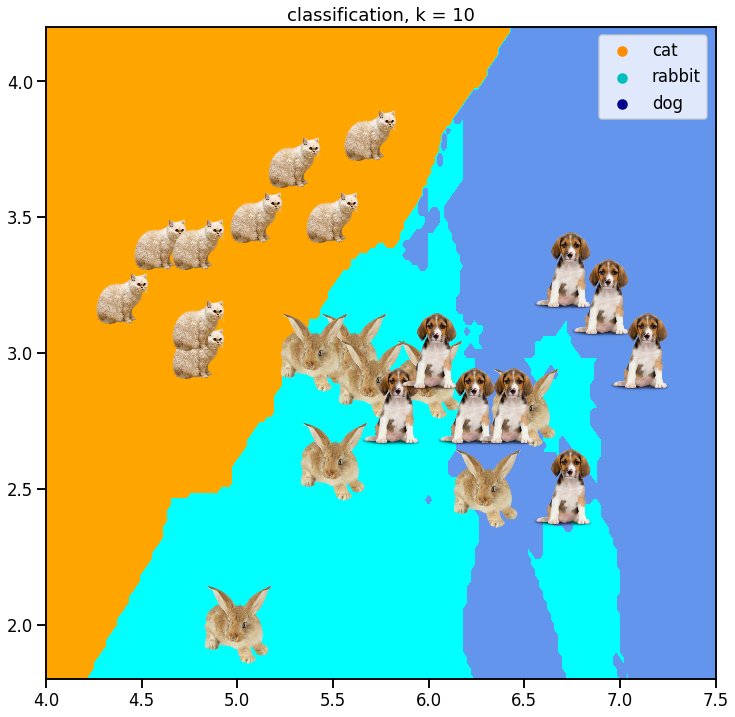

In [ ]:
plot(10)